# Opening Image Files with OpenCV

Important Notes:

- OpenCV and Matplotlib expect different orders of the RGB channels
    - Matplotlib Orders: RED GREEN BLUE
    - OpenCV Orders: BLUE GREEN RED

## Import Libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

## Read Data

In [48]:
# Abrimos la imagen con openCV: Se trata de una matriz de numpy
img = cv2.imread('../images/bananos.jpg')
type(img)

numpy.ndarray

In [49]:
# Resolución de 900x1200 píxeles y 3 valores por píxel (RGB)
img.shape

(900, 1200, 3)

In [50]:
img[500,500]

array([  0, 187, 245], dtype=uint8)

## Display the Image

Recuerda que Matplotlib y OpenCV trabajan por defecto en diferentes ordenes RGB

- Matplotlib Orders: RED GREEN BLUE
- OpenCV Orders: BLUE GREEN RED

### BGR

[ 21 211 252]


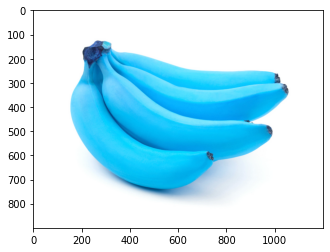

In [51]:
# rare color? OpenCv la ha abierto en BGR
plt.imshow(img);
print(img[600,500]) # Imprimimos un Píxel BGR

### RGB

[252 211  21]


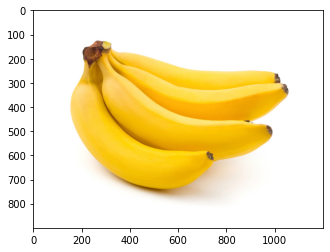

In [52]:
# Convert the color channels from BGR (OpenCV default) to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(rgb_img[600,500]) # Imprimimos un Píxel RGB
plt.imshow(rgb_img);

### HSV

[ 25 234 252]


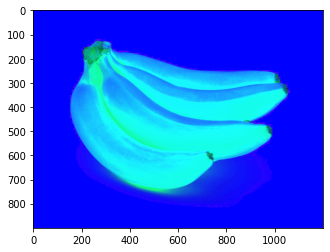

In [53]:
# Lo pasamos a HSI Hue Saturation Intensity
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(hsv_img[600,500]) # Imprimimos un Píxel HSV
plt.imshow(hsv_img);

### Gray Scale

- Es más sencillo trabajar con 1 valor por píxel que 3 valores por píxel
- Obtener medidas sobre la intensidad en la imagen

202


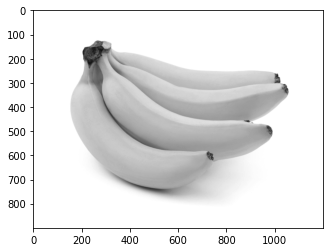

In [54]:
# Pasamos a Escala de Grises (Un solo valor por píxel donde 0 es negro y 255 blanco)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img[600,500]) # Imprimimos un Píxel Gray Scale
plt.imshow(gray_img, cmap='gray');

# Alternativa: Leer la imagen en escala de grises
# gray_img = cv2.imread('../images/bananos.jpg', cv2.IMREAD_GRAYSCALE)

### Binaria

- Se usa para resaltar objetos de interés
- Obtener medidss sobre la forma de los objetos

255


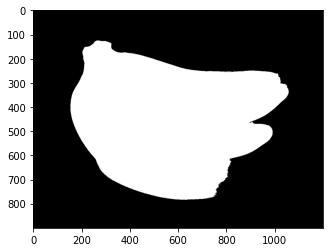

In [55]:
umbral = 230
binaria = np.uint8((gray_img<umbral)*255) # uint8 es un entero de 8 bits por lo tanto es un entero entre 0 y 255
print(binaria[600,500]) # Imprimimos un Píxel binario
plt.imshow(binaria, cmap='gray');

## Operaciones básicas con una imagen (matriz)

In [56]:
# Conocer cual es el valor mínimo de una imagen
print(f"Mínimo: {np.min(gray_img)}")
# Dónde se encuentra ese valor?
print(np.argmin(gray_img)) # posición flatten 727942 de la matriz

# Conocer cual es el valor máximo de una imagen
print(f"Máximo: {np.max(gray_img)}")
# Dónde se encuentra ese valor?
print(np.argmax(gray_img)) # posición flatten 0 de la matriz

Mínimo: 28
727942
Máximo: 255
0


In [57]:
# Media (matriz)
print(f"Media: {np.mean(gray_img)}")

# Varianza (matriz): representa la variabilidad de un conjunto de datos respecto de la media aritmética de los mismo
print(f"Varianza: {np.var(gray_img)}")

# Desviación estandar: Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado)
# mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio
print(f"Desv. Estandar: {np.sqrt(np.var(gray_img))}")

# Interpretación: Mayoría de datos están entre Media +- Desv. Estandar
print(f"Media+-Desv. Estandar: {np.mean(gray_img)-np.sqrt(np.var(gray_img)),np.mean(gray_img)+np.sqrt(np.var(gray_img))}")

Media: 230.78031296296297
Varianza: 1248.1855394576091
Desv. Estandar: 35.32966939355093
Media+-Desv. Estandar: (195.45064356941202, 266.1099823565139)


## Operaciones bássicas con varias imágenes (matrices)

- Suma de matrices
- Resta de matrices
- Promedio de matrices

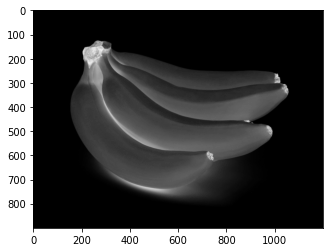

In [58]:
plt.imshow(binaria - gray_img, cmap='gray');

## Histograma de una imagen

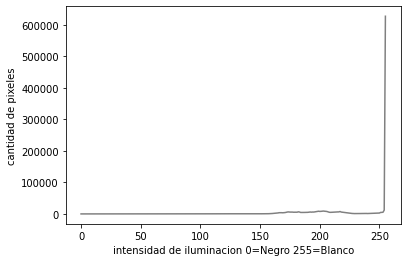

In [59]:
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminacion 0=Negro 255=Blanco')
plt.ylabel('cantidad de pixeles')
plt.show()

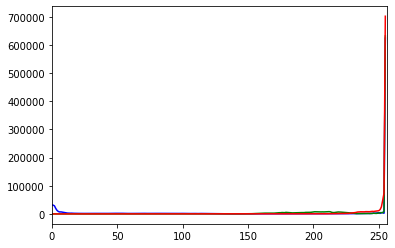

In [60]:
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

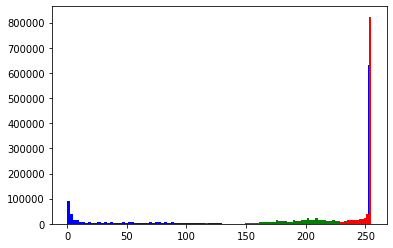

In [65]:
color = ('b','g','r')

for i, c in enumerate(color):
    canal = img[:,:,i].flatten()
    plt.hist(canal, bins=100, color=c)


plt.show()

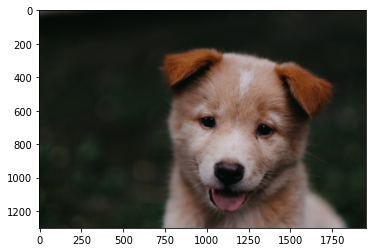

In [61]:
image = cv2.imread('../images/00-puppy.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb);

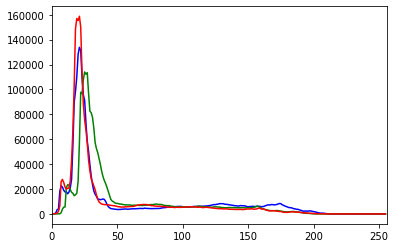

In [62]:
color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

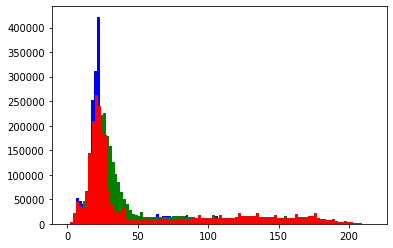

In [66]:
color = ('b','g','r')

for i, c in enumerate(color):
    canal = image[:,:,i].flatten()
    plt.hist(canal, bins=100, color=c)


plt.show()

#### Ejercicio: Cómo distinguir entre los plátanos y el fondo?

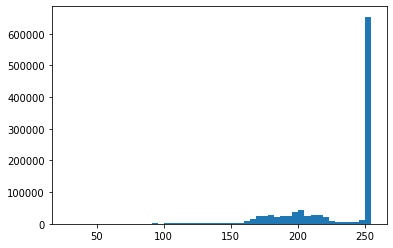

In [63]:
# Aplanamos matriz
vector = gray_img.flatten()
# Histograma
plt.hist(vector, bins=50);

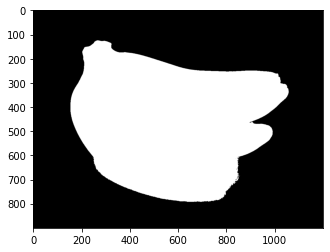

In [64]:
umbral = 240
binaria = np.uint8((gray_img<umbral)*255) # uint8 es un entero de 8 bits por lo tanto es un entero entre 0 y 255
plt.imshow(binaria, cmap='gray');

Con la imagen binaria podemos hacer una __máscara__